# Импортируем библиотеки:

In [1]:
import tensorflow as tf
import keras as keras
import keras.models as M
import keras.layers as L
import keras.backend as K
from keras.callbacks import ModelCheckpoint
import keras.utils as utils
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import visualkeras
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Определяем константы:

In [2]:
n_classes = 3
height = 500
width = 500

# Инициализируем генератор базы данных:

In [3]:
training_datagen = ImageDataGenerator(rescale = 1./255)

train_datagen = training_datagen.flow_from_directory('TrainBW',
                                                     target_size=(height, width),
                                                     batch_size=32,
                                                     class_mode='categorical',)

val_datagen = ImageDataGenerator(rescale=1. / 255)

validation_datagen = val_datagen.flow_from_directory('ValBW',
                                                     target_size=(height, width),
                                                     batch_size=32,
                                                     class_mode='categorical',)

Found 2142 images belonging to 3 classes.
Found 911 images belonging to 3 classes.


# Создание нейросетей:

## CNN1:

In [4]:
K.clear_session()

In [5]:
input = L.Input(shape=(height, width, 3))
x = L.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same')(input)
x = L.BatchNormalization()(x)
x = L.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same')(x)
x = L.BatchNormalization()(x)
x = L.MaxPool2D(pool_size=(2, 2))(x)
x = L.Dropout(rate=0.3)(x)
x = L.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
x = L.BatchNormalization()(x)
x = L.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
x = L.BatchNormalization()(x)
x = L.MaxPool2D(pool_size=(2, 2))(x)
x = L.Dropout(rate=0.3)(x)
x = L.Flatten()(x)
x = L.Dense(units=256, activation='relu')(x)
x = L.BatchNormalization()(x)
x = L.Dropout(rate=0.5)(x)
output = L.Dense(units=n_classes, activation='sigmoid')(x)

model = M.Model(inputs=input, outputs=output, name = 'BW1')

Model: "BW1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 500, 500, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 500, 500, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 500, 500, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 500, 500, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 250, 250, 64)      0       

ValueError: Could not save to JPEG for display

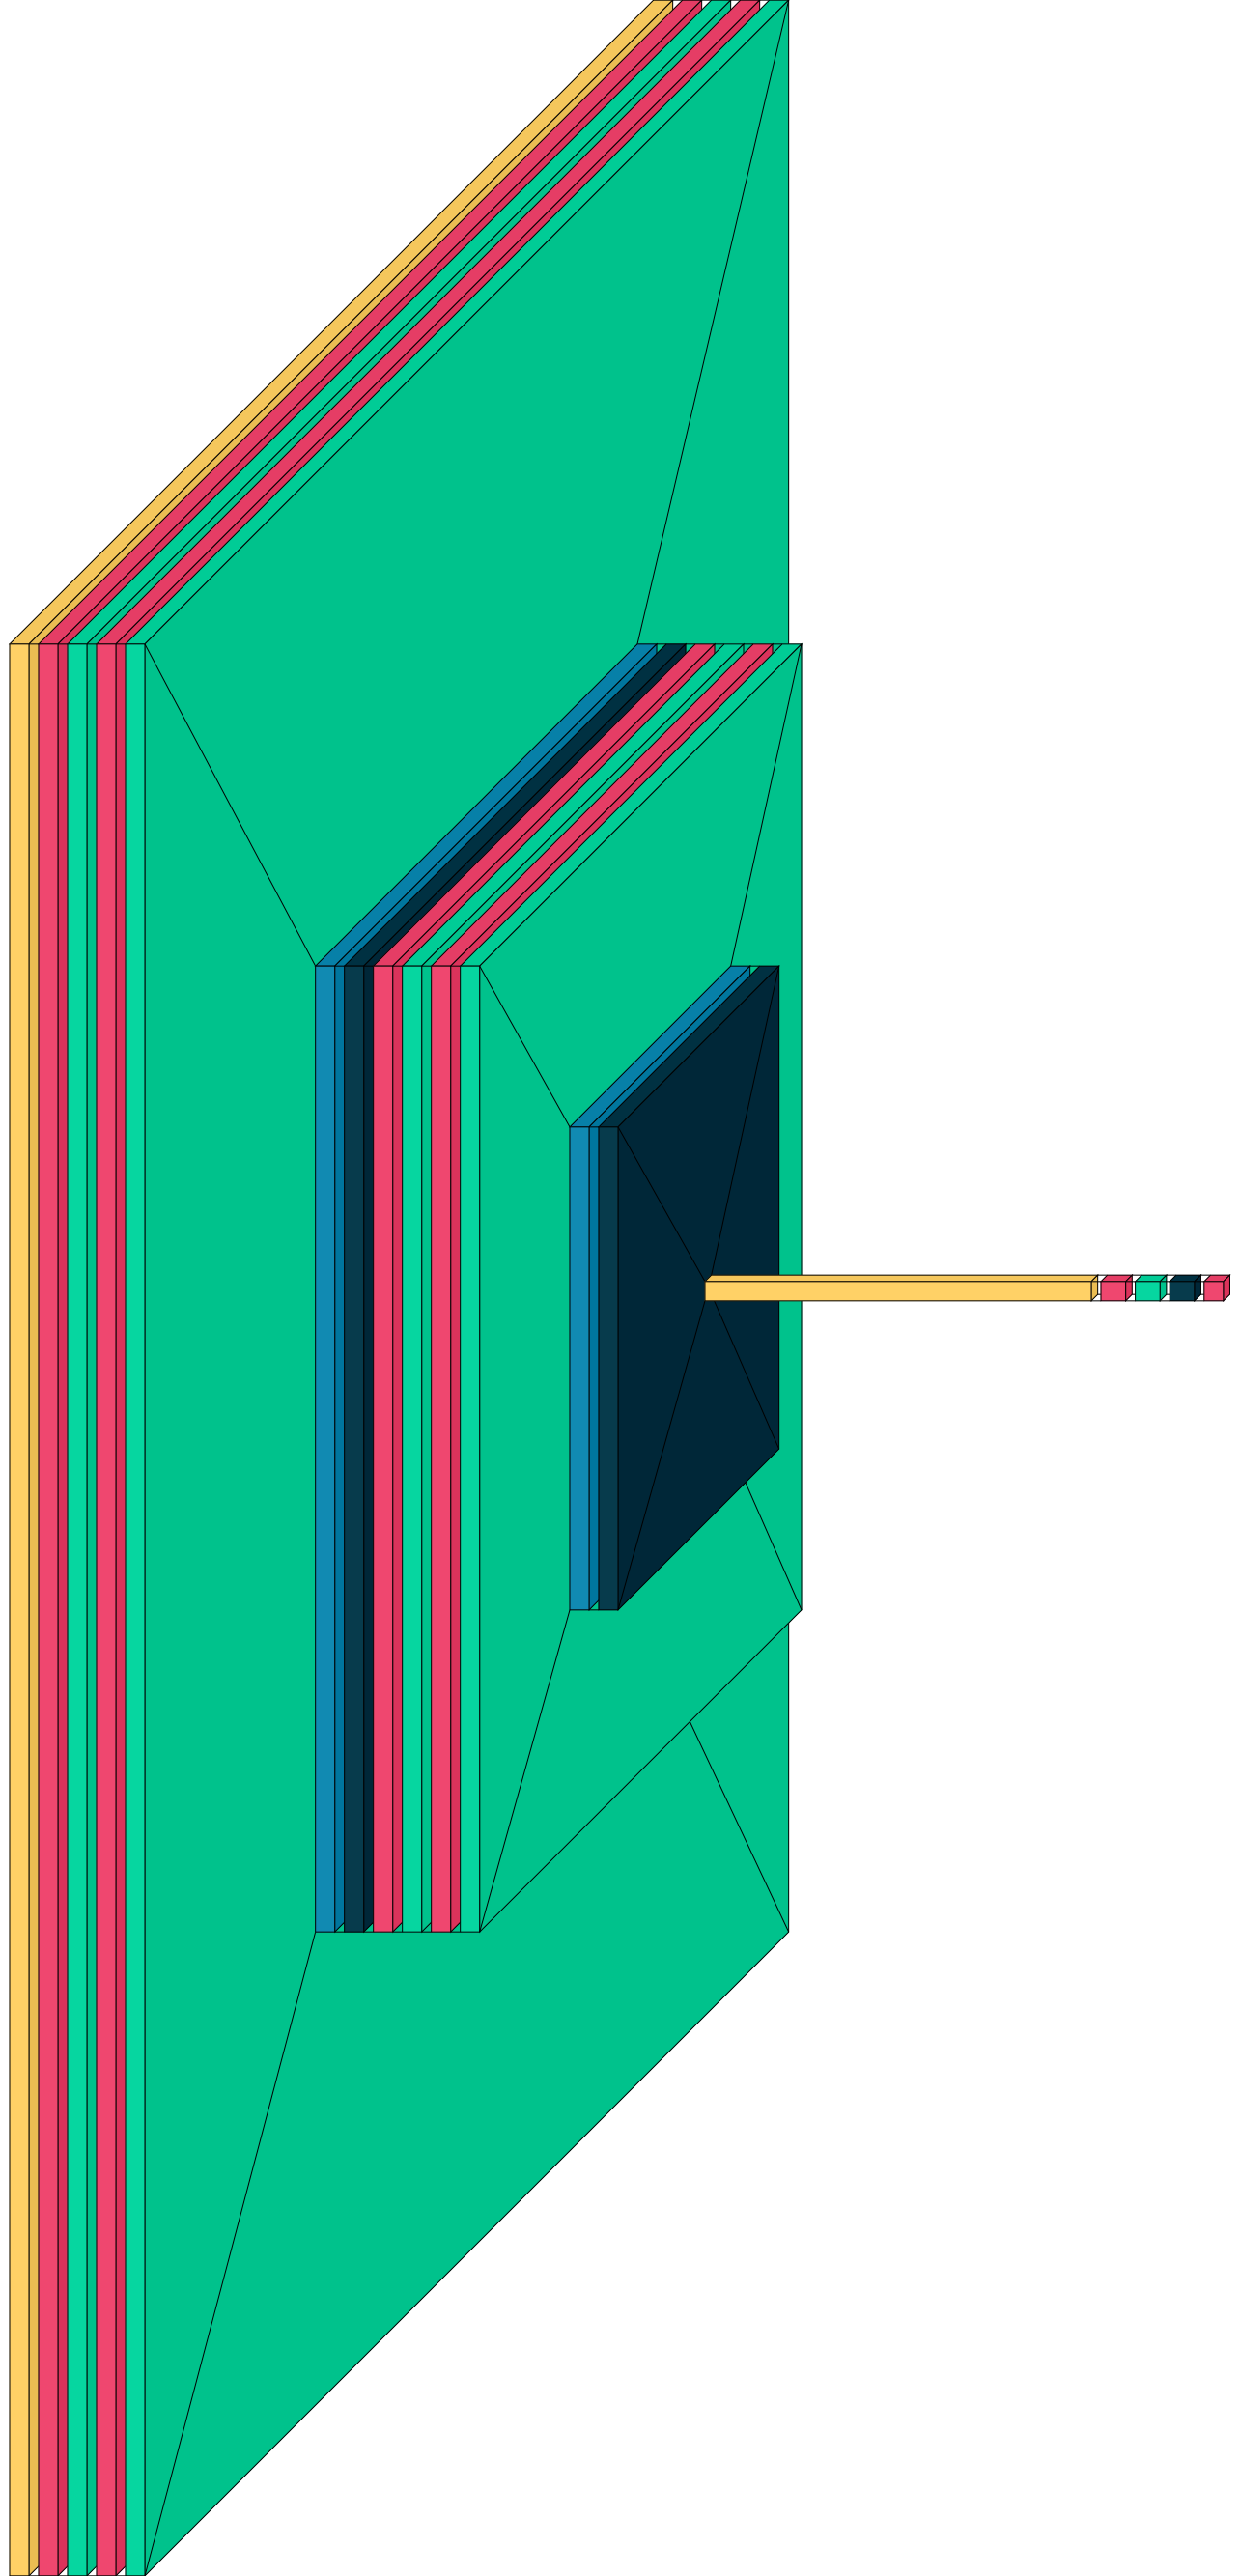

In [6]:
model.summary()
visualkeras.layered_view(model, to_file='CNN1.png')

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

checkpoint_callback = ModelCheckpoint(filepath = os.path.join('', 'cnn1.0({val_accuracy:.2f})-BW.h5'),
                             monitor = 'val_accuracy',
                             save_best_only = True,
                             mode = 'max')

history  = model.fit(train_datagen,
                    validation_data = validation_datagen,
                    epochs = 10,
                    batch_size = 32,
                    callbacks = [checkpoint_callback])

Epoch 1/10
67/67 [==============================] - ETA: 0s - loss: 1.2153 - accuracy: 0.5098 

c:\Users\mdpan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 1070s 16s/step - loss: 1.2153 - accuracy: 0.5098 - val_loss: 33.8599 - val_accuracy: 0.3282
Epoch 2/10
67/67 [==============================] - 1044s 16s/step - loss: 0.8280 - accuracy: 0.6424 - val_loss: 48.6457 - val_accuracy: 0.3732
Epoch 3/10
67/67 [==============================] - 1041s 15s/step - loss: 0.5650 - accuracy: 0.7820 - val_loss: 21.2149 - val_accuracy: 0.4149
Epoch 4/10
67/67 [==============================] - 1040s 16s/step - loss: 0.4149 - accuracy: 0.8483 - val_loss: 1.8981 - val_accuracy: 0.4720
Epoch 5/10
67/67 [==============================] - 1038s 15s/step - loss: 0.2071 - accuracy: 0.9342 - val_loss: 1.0285 - val_accuracy: 0.5368
Epoch 6/10
67/67 [==============================] - 1043s 16s/step - loss: 0.1356 - accuracy: 0.9603 - val_loss: 0.9787 - val_accuracy: 0.5730
Epoch 7/10
67/67 [==============================] - 1035s 15s/step - loss: 0.0683 - accuracy: 0.9841 - val_loss: 1.0115 - val_accuracy: 0.6290
Epoch 8

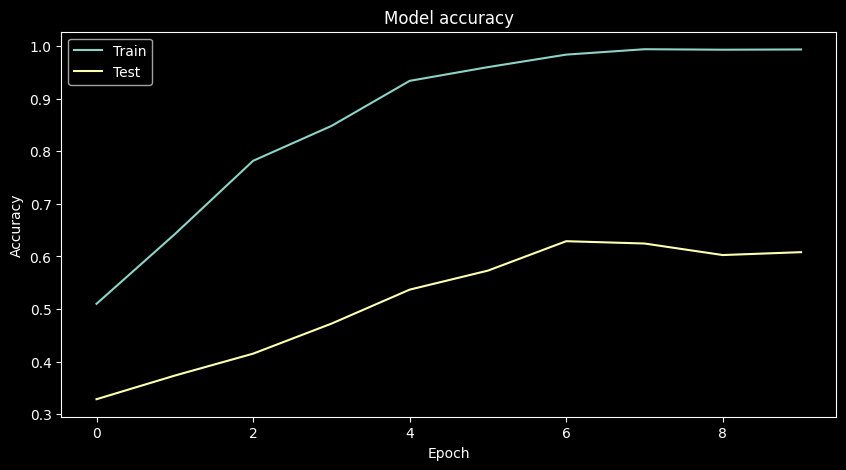

In [8]:
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

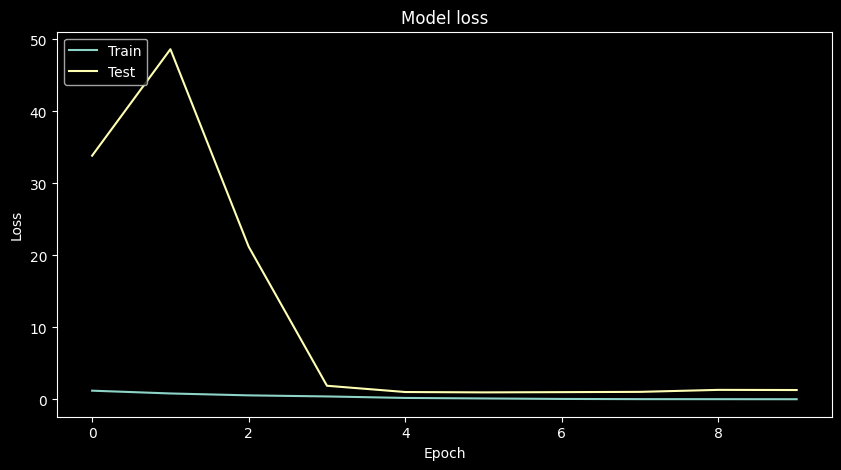

In [9]:
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## CNN2:

In [10]:
K.clear_session()

In [11]:
input = L.Input(shape=(height, width, 3))

x = L.Conv2D(32, (5, 5), activation='relu',padding='valid')(input)
x = L.Conv2D(32, (1, 1), activation='relu')(x)
x = L.Conv2D(32, (1, 1), activation='relu')(x)
x = L.MaxPooling2D((2,2))(x)
x = L.Dropout(0.5)(x)

x = L.Conv2D(64, (3, 3), activation='relu',padding='valid')(x)
x = L.Conv2D(64, (1, 1), activation='relu')(x)
x = L.Conv2D(64, (1, 1), activation='relu')(x)
x = L.MaxPooling2D((2,2))(x)
x = L.Dropout(0.5)(x)

x = L.Conv2D(128, (3, 3), activation='relu',padding='valid')(x)
x = L.Conv2D(32, (1, 1), activation='relu')(x)
x = L.Conv2D(n_classes, (1, 1))(x)

x = L.GlobalAveragePooling2D()(x)
x = L.Activation(activation='softmax')(x)

model = M.Model(input, x, name='BW2')

In [12]:
model.summary()

Model: "BW2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 496, 496, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 496, 496, 32)      1056      
                                                                 
 conv2d_2 (Conv2D)           (None, 496, 496, 32)      1056      
                                                                 
 max_pooling2d (MaxPooling2  (None, 248, 248, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 248, 248, 32)      0         
                                                               

In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

checkpoint_callback = ModelCheckpoint(filepath = os.path.join('', 'cnn2.0({val_accuracy:.2f})-BW.h5'),
                             monitor = 'val_accuracy',
                             save_best_only = True,
                             mode = 'max')

history  = model.fit(train_datagen,
                    validation_data = validation_datagen,
                    epochs = 10,
                    batch_size = 16,
                    callbacks = [checkpoint_callback])

Epoch 1/10
67/67 [==============================] - 388s 6s/step - loss: 1.0774 - accuracy: 0.3361 - val_loss: 1.0735 - val_accuracy: 0.4424
Epoch 2/10


c:\Users\mdpan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 387s 6s/step - loss: 0.9889 - accuracy: 0.4734 - val_loss: 0.9588 - val_accuracy: 0.5093
Epoch 3/10
67/67 [==============================] - 387s 6s/step - loss: 0.9253 - accuracy: 0.5373 - val_loss: 0.8966 - val_accuracy: 0.5148
Epoch 4/10
67/67 [==============================] - 387s 6s/step - loss: 0.9066 - accuracy: 0.5546 - val_loss: 0.8900 - val_accuracy: 0.5884
Epoch 5/10
67/67 [==============================] - 388s 6s/step - loss: 0.9055 - accuracy: 0.5532 - val_loss: 0.8848 - val_accuracy: 0.5587
Epoch 6/10
67/67 [==============================] - 388s 6s/step - loss: 0.8868 - accuracy: 0.5733 - val_loss: 0.9041 - val_accuracy: 0.5104
Epoch 7/10
67/67 [==============================] - 389s 6s/step - loss: 0.9018 - accuracy: 0.5560 - val_loss: 0.8866 - val_accuracy: 0.5807
Epoch 8/10
67/67 [==============================] - 388s 6s/step - loss: 0.8744 - accuracy: 0.5994 - val_loss: 0.8618 - val_accuracy: 0.5521
Epoch 9/10
67/67 [======

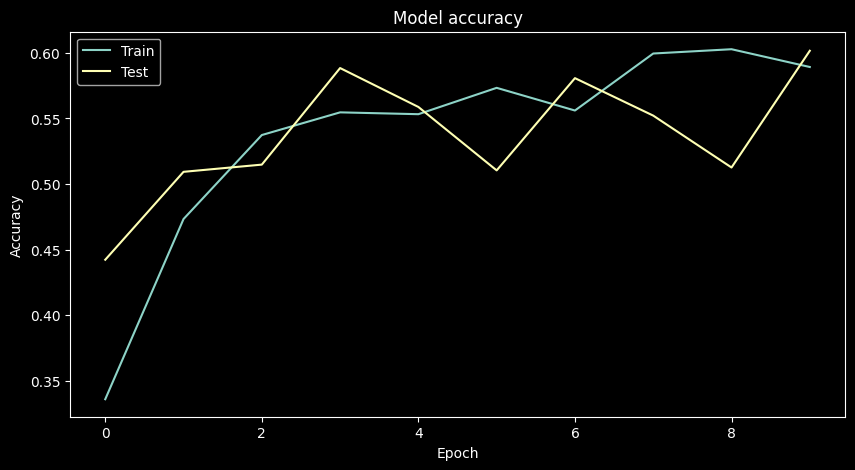

In [14]:
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

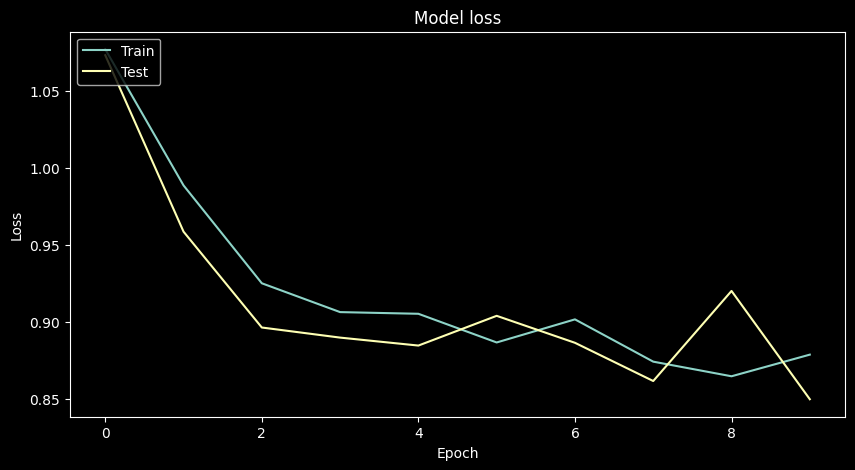

In [15]:
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## CNN3:

In [16]:
K.clear_session()

In [17]:
input = L.Input(shape=(height, width, 3))
x = L.Conv2D(96, kernel_size=(3, 3), activation='relu', padding = 'same')(input)
x = L.Conv2D(96, (3, 3), activation='relu', padding = 'same')(x)
x = L.Conv2D(96, (3, 3), activation='relu', padding = 'same', strides = 2)(x)
x = L.Conv2D(192, (3, 3), activation='relu', padding = 'same')(x)
x = L.Conv2D(192, (3, 3), activation='relu', padding = 'same')(x)
x = L.Conv2D(192, (3, 3), activation='relu', padding = 'same', strides = 2)(x)
x = L.Conv2D(192, (3, 3), activation='relu', padding = 'same')(x)
x = L.Conv2D(192, (1, 1), activation='relu')(x)
x = L.Conv2D(n_classes, (1, 1))(x)
x = L.GlobalAveragePooling2D()(x)
output = L.Activation(activation='softmax')(x)

model = M.Model(inputs=input, outputs=output, name = 'BW3')

In [18]:
model.summary()

Model: "BW3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 500, 500, 96)      2688      
                                                                 
 conv2d_1 (Conv2D)           (None, 500, 500, 96)      83040     
                                                                 
 conv2d_2 (Conv2D)           (None, 250, 250, 96)      83040     
                                                                 
 conv2d_3 (Conv2D)           (None, 250, 250, 192)     166080    
                                                                 
 conv2d_4 (Conv2D)           (None, 250, 250, 192)     331968    
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 192)     331968  

In [19]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

checkpoint_callback = ModelCheckpoint(filepath = os.path.join('', 'cnn3.0({val_accuracy:.2f})-BW.h5'),
                             monitor = 'val_accuracy',
                             save_best_only = True,
                             mode = 'max')

history  = model.fit(train_datagen,
                    validation_data = validation_datagen,
                    epochs = 10,
                    batch_size = 32,
                    callbacks = [checkpoint_callback])

Epoch 1/10
67/67 [==============================] - 2163s 32s/step - loss: 1.0718 - accuracy: 0.3375 - val_loss: 0.9496 - val_accuracy: 0.4896
Epoch 2/10


c:\Users\mdpan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 2160s 32s/step - loss: 1.0501 - accuracy: 0.4076 - val_loss: 0.9597 - val_accuracy: 0.5565
Epoch 3/10
67/67 [==============================] - 2173s 32s/step - loss: 0.9674 - accuracy: 0.5009 - val_loss: 0.9944 - val_accuracy: 0.4621
Epoch 4/10
67/67 [==============================] - 2167s 32s/step - loss: 0.9499 - accuracy: 0.5000 - val_loss: 0.9082 - val_accuracy: 0.4984
Epoch 5/10
67/67 [==============================] - 2160s 32s/step - loss: 0.9203 - accuracy: 0.5289 - val_loss: 0.8925 - val_accuracy: 0.5148
Epoch 6/10
67/67 [==============================] - 2165s 32s/step - loss: 0.8985 - accuracy: 0.5626 - val_loss: 0.8572 - val_accuracy: 0.5752
Epoch 7/10
67/67 [==============================] - 2165s 32s/step - loss: 0.8765 - accuracy: 0.5682 - val_loss: 0.8465 - val_accuracy: 0.6279
Epoch 8/10
67/67 [==============================] - 2163s 32s/step - loss: 0.8445 - accuracy: 0.6275 - val_loss: 0.8031 - val_accuracy: 0.6279
Epoch 9/10

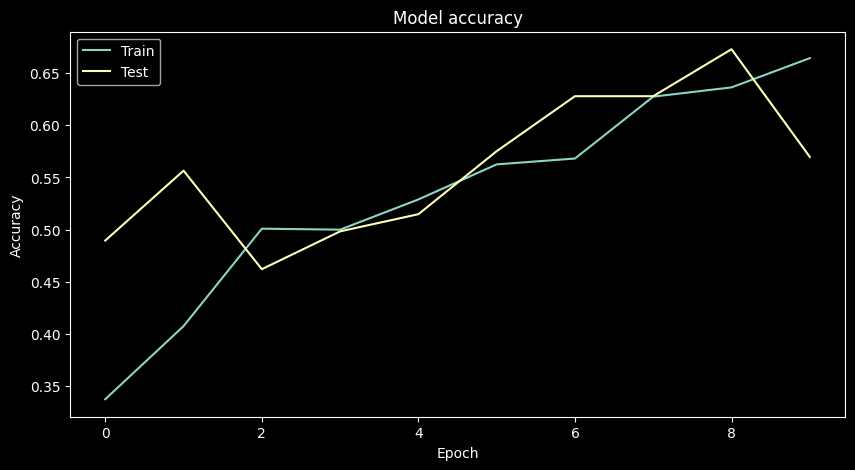

In [20]:
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

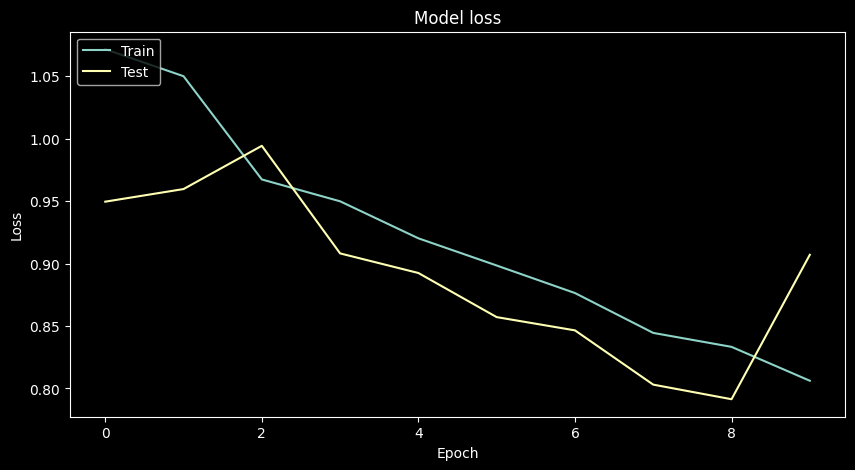

In [21]:
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()